# Differential Equations
- Differential equation functionality in Julia with explanation

### Basics: Functions and Derivatives
- Functions can be defined using syntax equivalent to the mathematical notation
- Derivatives are not built in to Julia's standard library, so I have included the following libraries
- https://github.com/JuliaSymbolics/Symbolics.jl
- https://github.com/SciML/ModelingToolkit.jl

In [1]:
using Symbolics

# declare a variable to differente with respect to
@variables x
D = Differential(x)

# define function with symbolic variable x
y = x^3

# prepare derivative, calculate, and simplify form
dy = D(y) |> expand_derivatives


3(x^2)

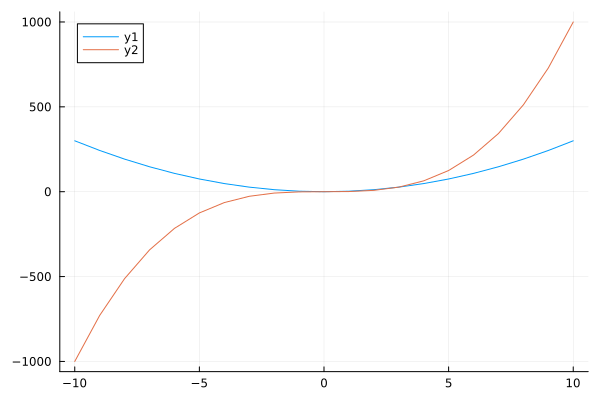

In [2]:
using Plots

# convert symbolic expression to Julia function
dy = build_function(dy, x, expression = Val{false}) |> eval
y = build_function(y, x, expression = Val{false}) |> eval

plot!(-10:10, dy)
plot!(-10:10, y)